# Business Problem

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

# Data Collection and Description

In [45]:
df = pd.read_csv("C:/Users/admin/Downloads/Excelr Assignments/Multiple Linear Regression/ToyotaCorolla.csv",encoding='latin')

In [46]:
df1 = df [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [47]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [48]:
df1.shape

(1436, 9)

In [49]:
df1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


# Descriptive statistics

In [51]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


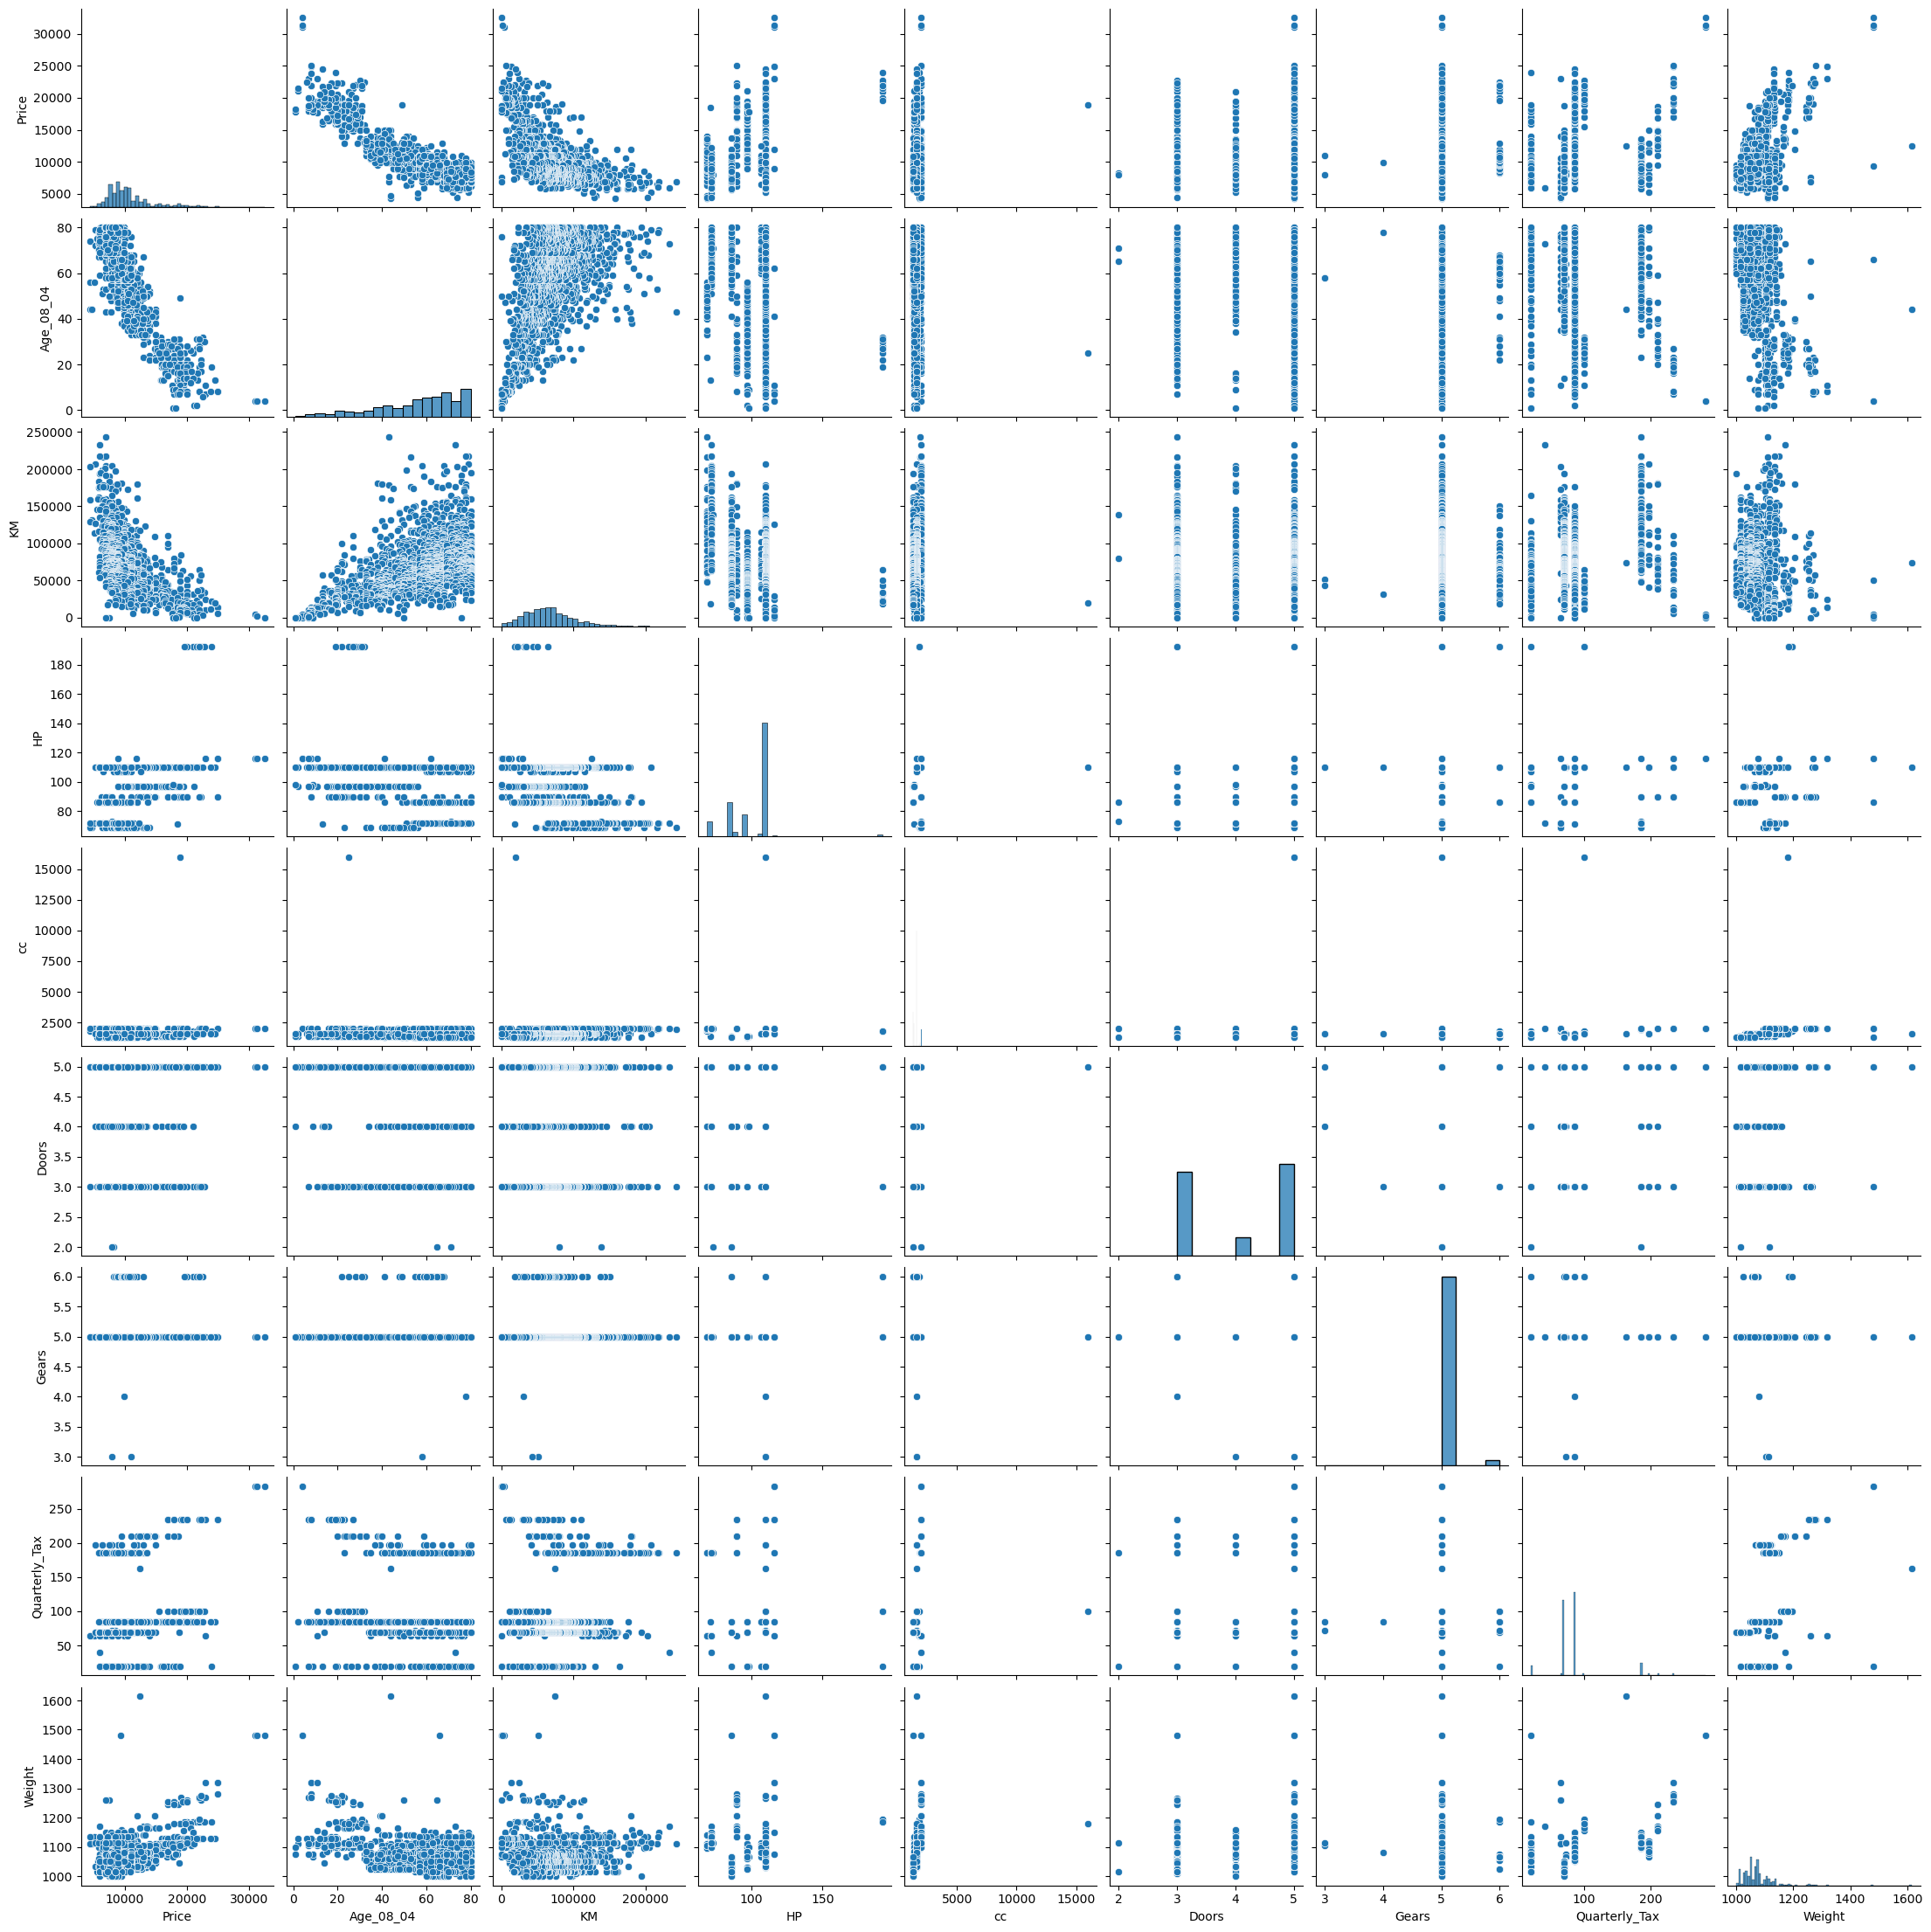

In [52]:
sns.pairplot(df1)

In [53]:
correlation = df1.corr()

<Axes: >

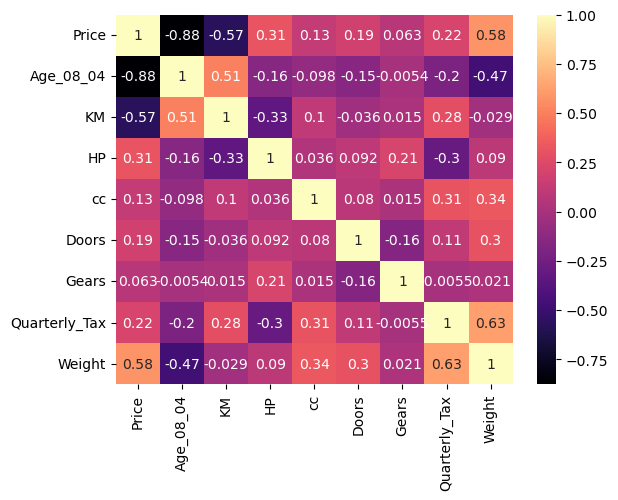

In [92]:
sns.heatmap(correlation,annot=True,cmap='magma')

# Graphs

<Axes: xlabel='Price', ylabel='HP'>

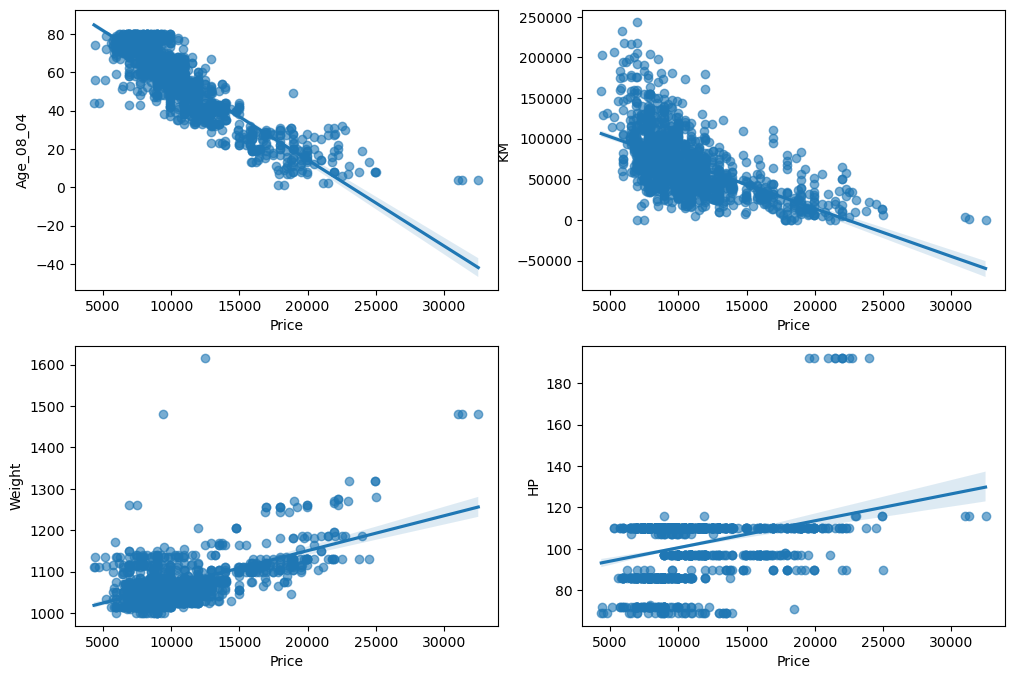

In [102]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Price', y = 'Age_08_04', data = df1, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Price', y = 'KM', data = df1, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Price', y = 'Weight', data = df1, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.regplot(x = 'Price', y = 'HP', data = df1, scatter_kws={'alpha':0.6}, ax = axes[1,1])

In [55]:
import statsmodels.formula.api as smf

In [56]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = df1).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:14:02   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [61]:
X = df1.drop(['Price'],axis=1)
y = df1.Price

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2054)

In [82]:
LR = LinearRegression()
model1 =LR.fit(X_train,y_train)

In [83]:
y_pred = Model1.predict(X_test)

In [84]:
from sklearn.metrics import r2_score


In [85]:
r2_score(y_pred,y_test)

0.8337889133509747

In [86]:
residuals = y_test-y_pred

In [87]:
residuals

787      555.000579
966     -452.933992
1149    1496.858515
1388     108.015908
1217     676.309371
           ...     
557     3245.864888
589     -771.372713
1371    1311.423434
793    -1013.670633
971     2010.936404
Name: Price, Length: 288, dtype: float64

In [88]:
import statsmodels.api as sm
Model2= sm.OLS(y_train, X_train).fit()

In [89]:
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.022e+04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:28:56   Log-Likelihood:                         -9883.3
No. Observations:                1148   AIC:                                  1.978e+04
Df Residuals:                    1140   BIC:                                  1.982e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.5485      2.684    -46.778      0.000    -130.814    -120.282
KM               -0.0210      0.001    -14.775      0.000      -0.024      -0.018
HP               33.8370      3.037     11.140      0.000      27.877      39.797
cc               -0.0434      0.090     -0.483      0.629      -0.220       0.133
Doors           -13.6369     44.211     -0.308      0.758    -100.380      73.107
Gears           303.6199    162.789      1.865      0.062     -15.779     623.019
Quarterly_Tax     6.4943      1.352      4.805      0.000       3.842       9.146
Weight           12.8156      0.843     15.203      0.000      11.162      14.470
==============================================================================
Omnibus:                       82.322   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.839
Skew:                          -0.011   Prob(JB):                     4.97e-86
Kurtosis:                       5.866   Cond. No.                     3.23e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
 from sklearn.model_selection import cross_val_score
validated_score =cross_val_score(Model1,X_train,y_train,cv=5)

In [97]:
np.mean(validated_score)

0.7548954134780894

# QQPlot

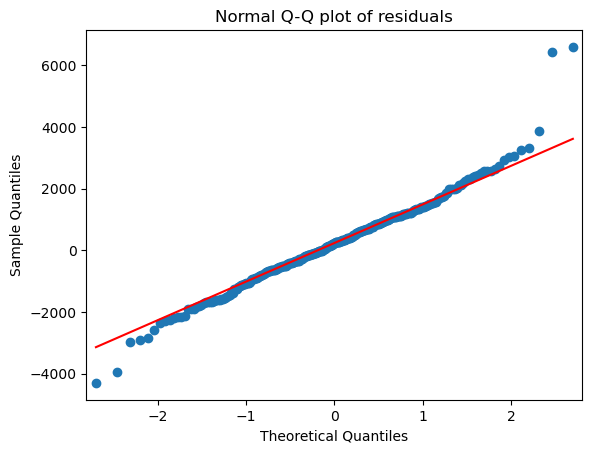

In [109]:
import statsmodels.api as sm
qqplot=sm.qqplot(residuals,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Homoscedasticity

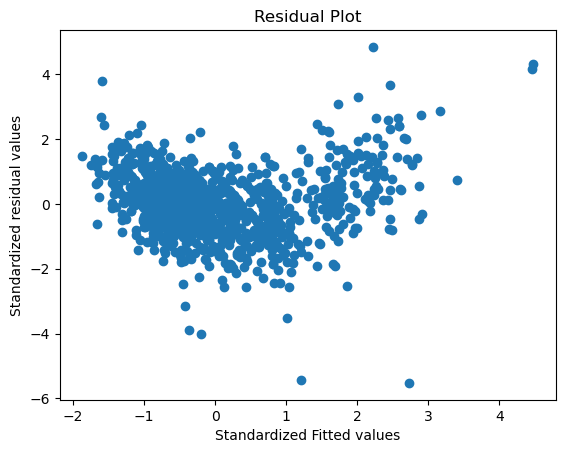

In [110]:
def a( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(a(Model2.fittedvalues),
           a(Model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


# Residual Vs Regressors

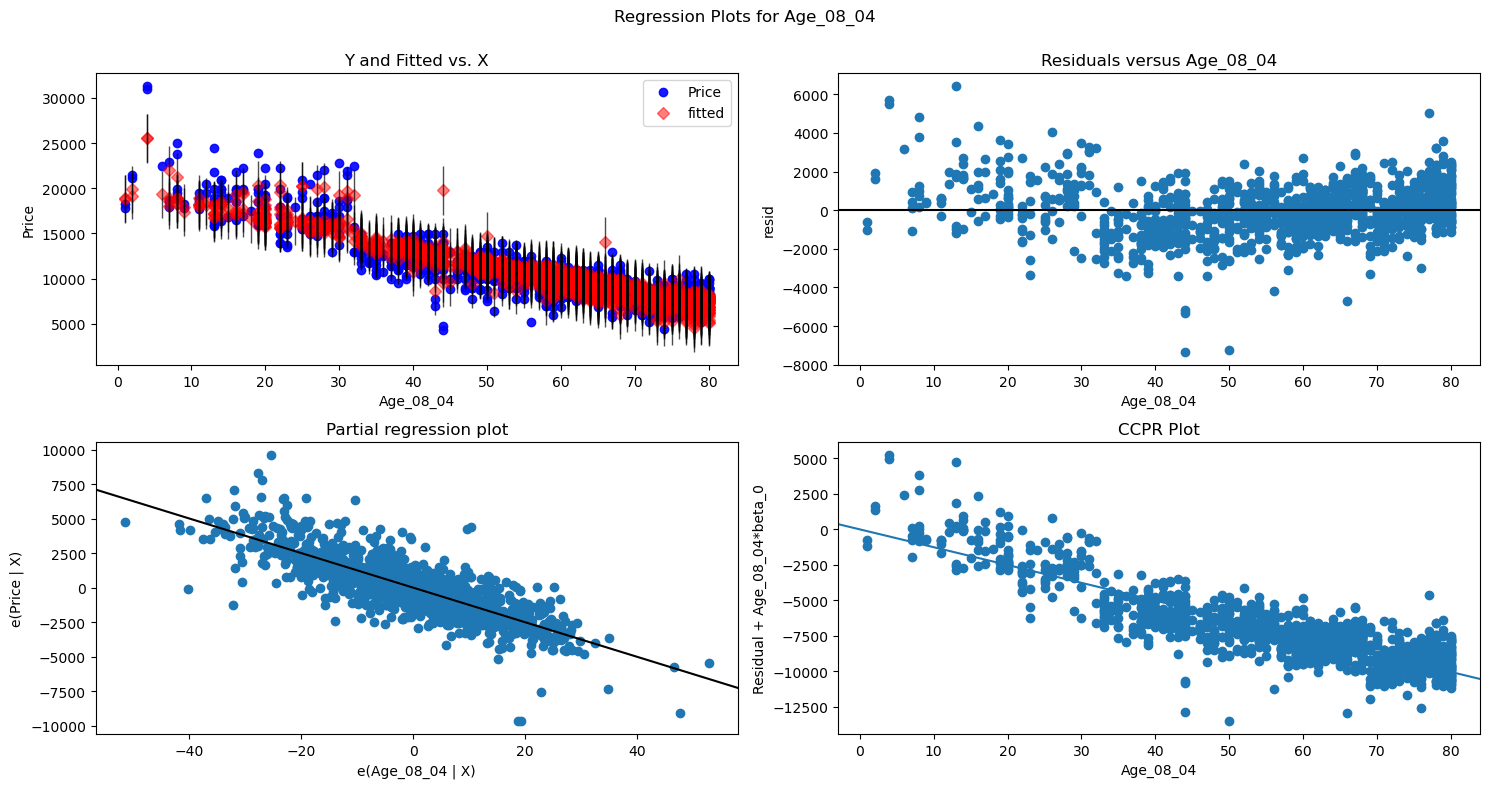

In [123]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"Age_08_04" , fig=fig)
plt.show()

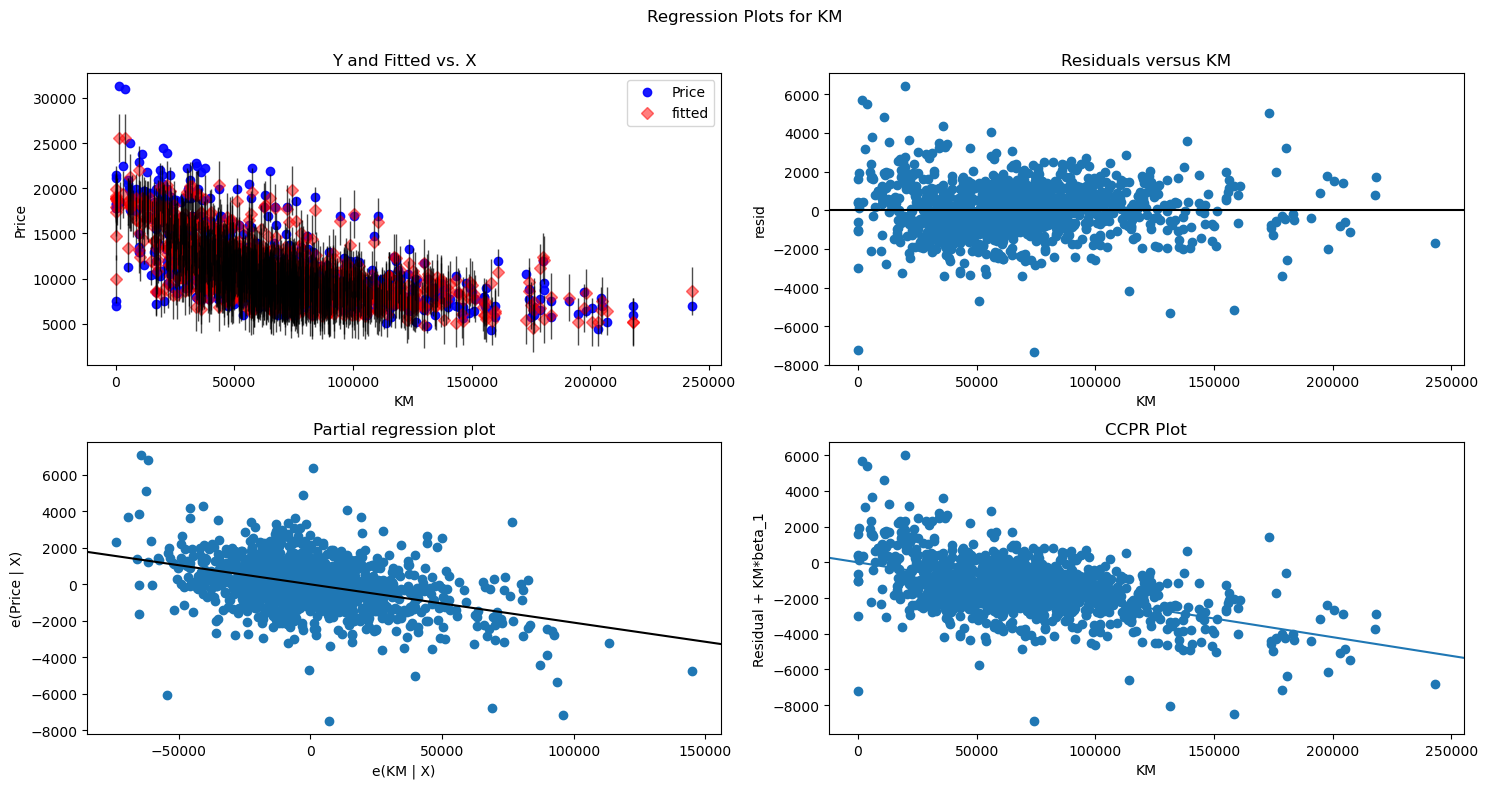

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"KM" , fig=fig)
plt.show()

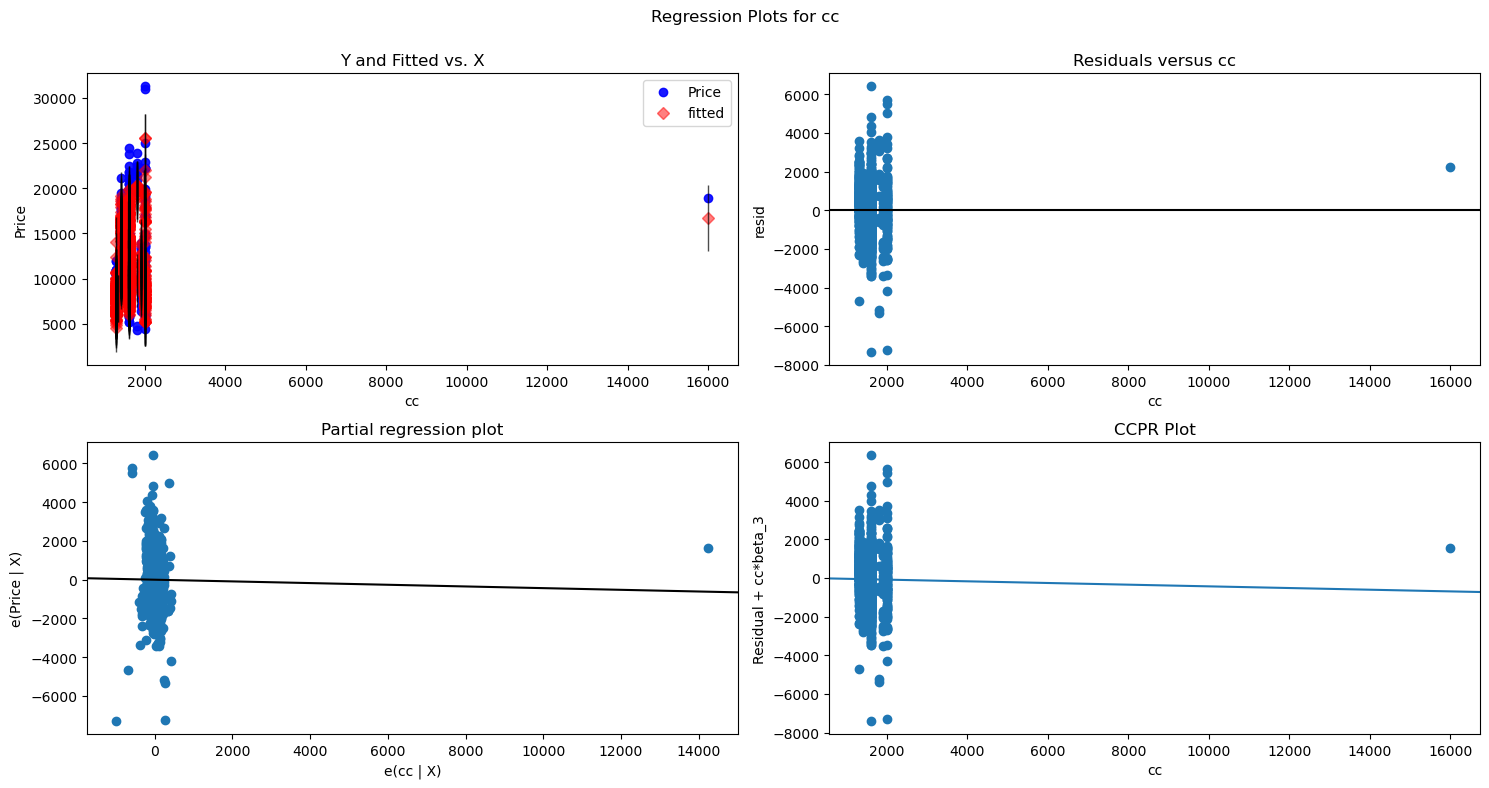

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"cc" , fig=fig)
plt.show()

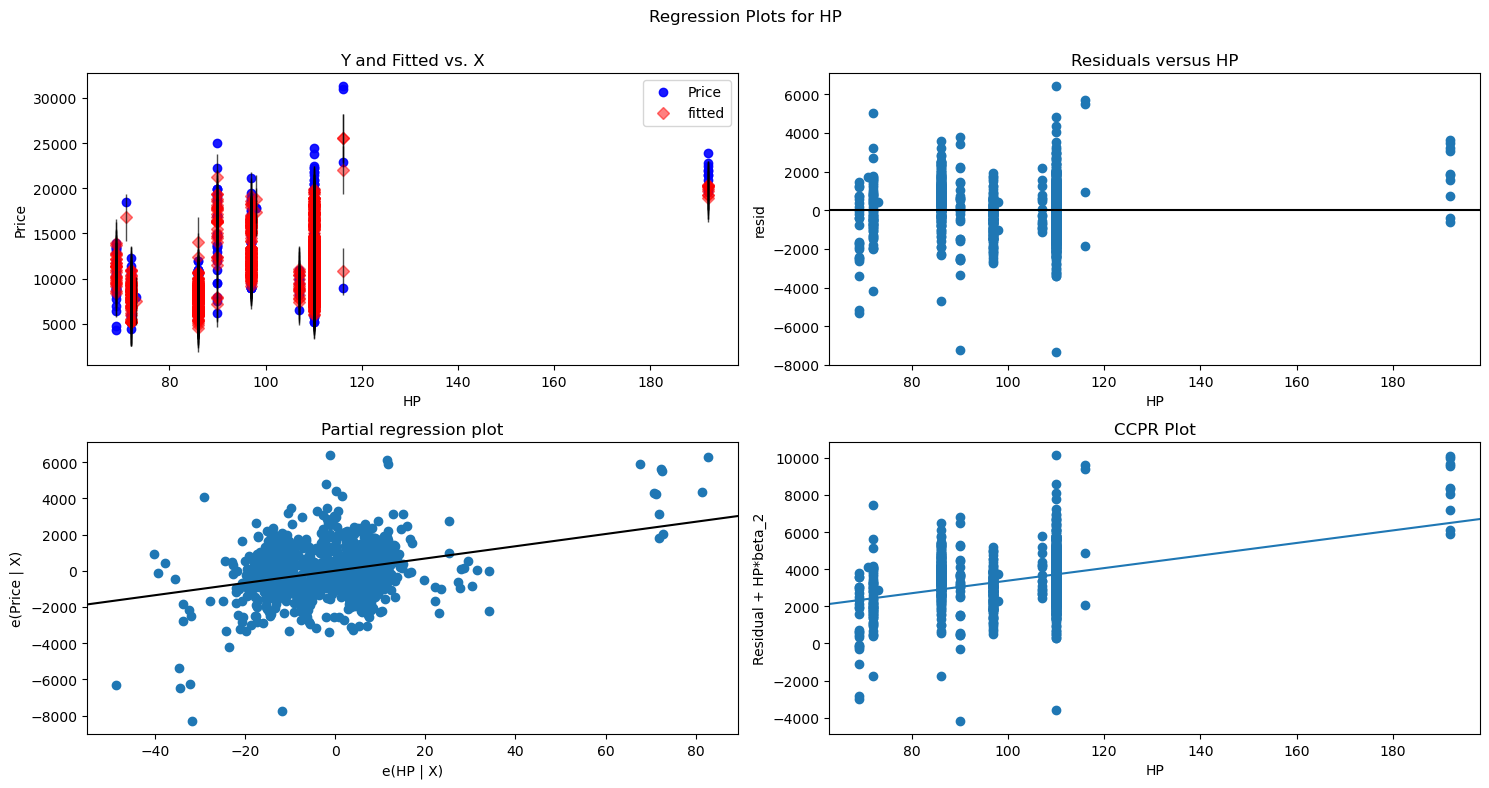

In [118]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"HP" , fig=fig)
plt.show()

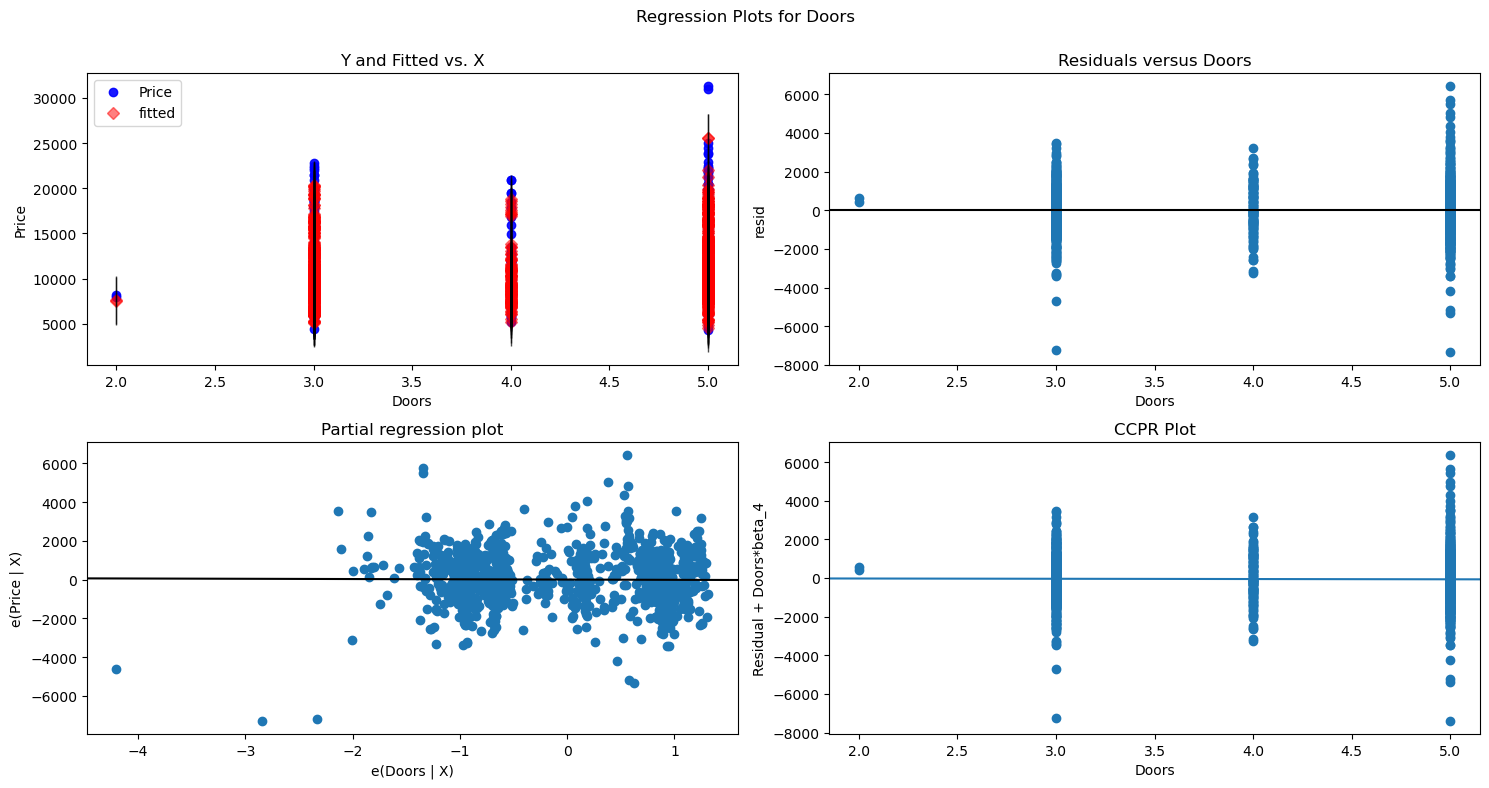

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"Doors" , fig=fig)
plt.show()

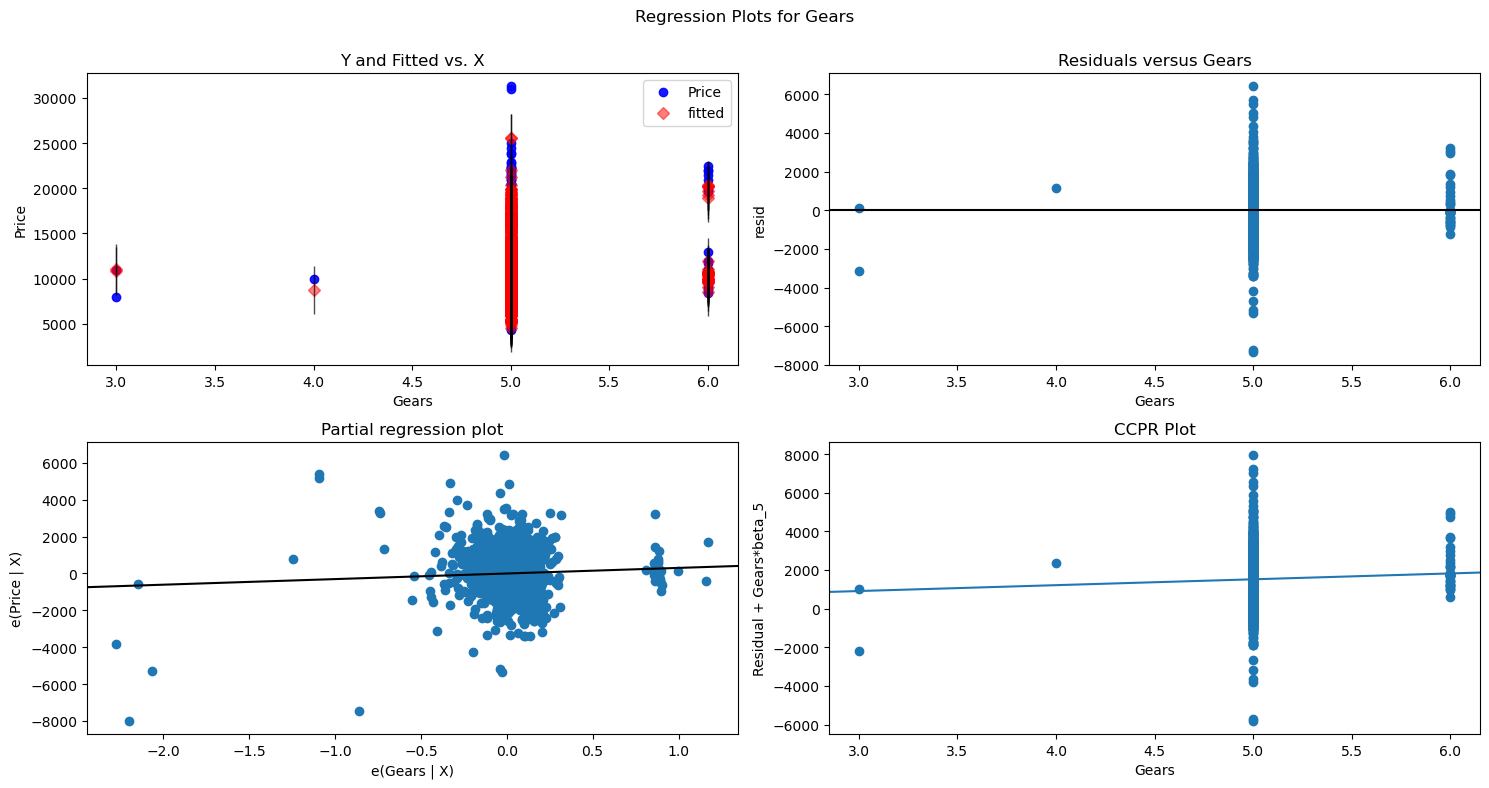

In [120]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"Gears" , fig=fig)
plt.show()

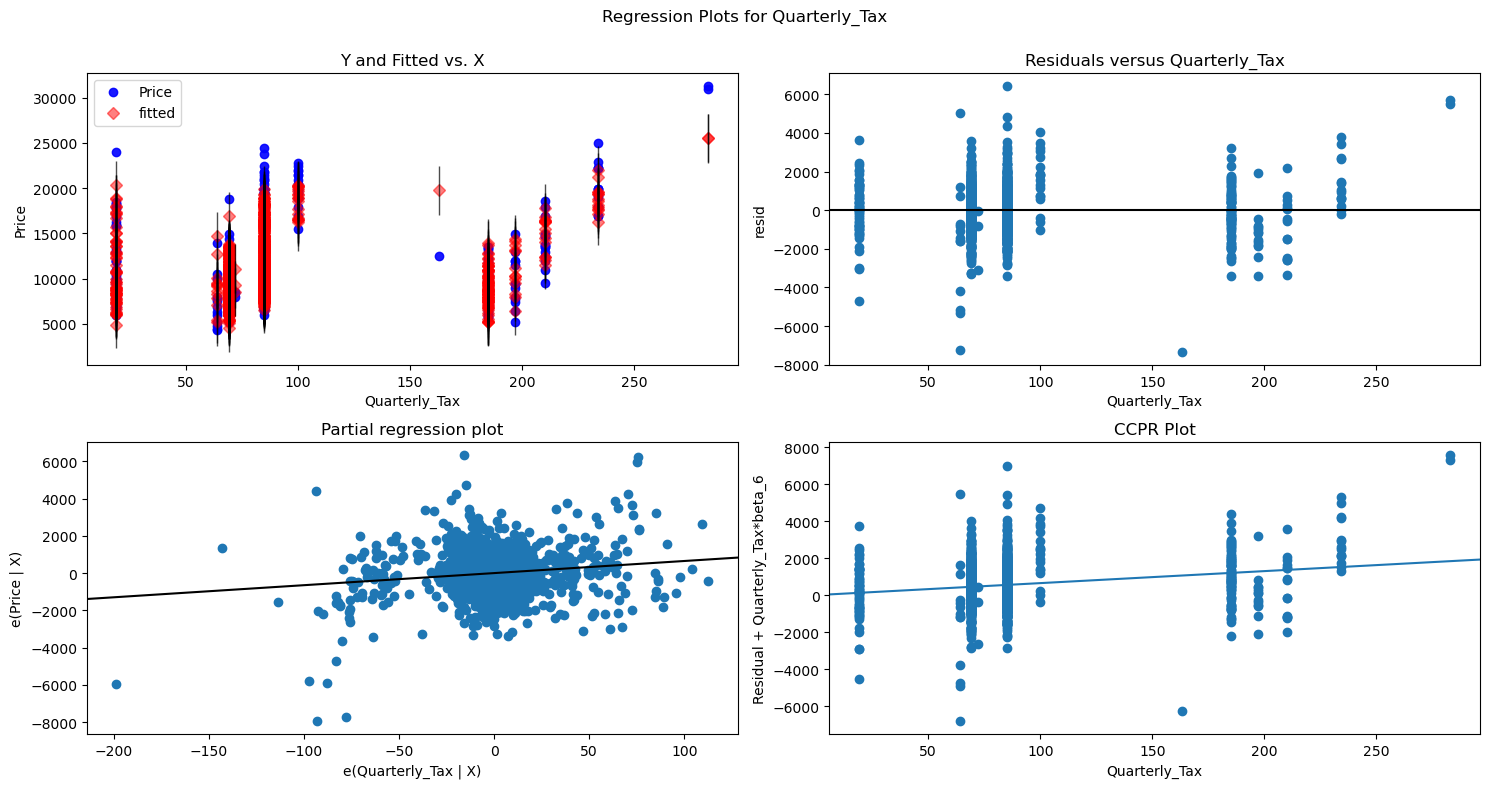

In [121]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"Quarterly_Tax" , fig=fig)
plt.show()

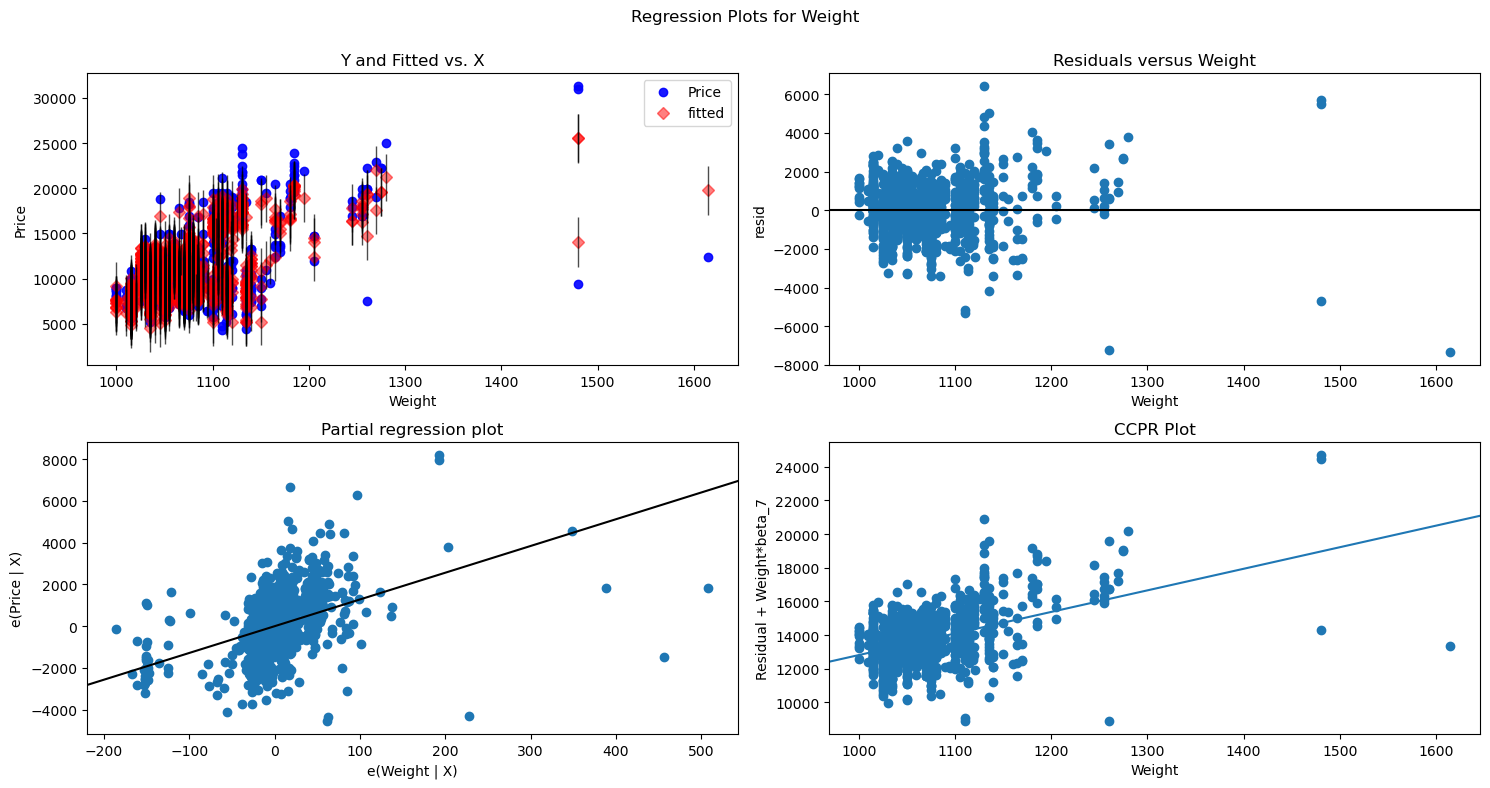

In [122]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model2,"Weight" , fig=fig)
plt.show()

In [111]:
df1.head(1)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165


# Cook's Distance


In [98]:
infl = model.get_influence()
summ_df = infl.summary_frame()
summ_df.sort_values('cooks_d', ascending=False)

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,0.515677,-4.705252e-01,-2.424235e+00,-2.781702,2.728110e+01,0.654770,3.652747e-01,-3.977656e+00,-3.071130e+00,7.952011e+01,7.982911,0.918237,26.752214,8.164500,27.360754
221,2.139174,-1.088602e+00,1.146065e-01,0.564540,6.410386e-01,0.630731,8.519313e-02,1.441506e+00,-3.039079e+00,1.021031e+00,-7.522228,0.139712,-3.031383,-7.673262,-3.092248
960,1.541031,-8.324005e-01,1.577609e-01,0.849805,3.489060e-01,0.685880,2.037714e-03,1.568607e+00,-2.319585e+00,6.049996e-01,-5.402011,0.157248,-2.333452,-5.456195,-2.356857
601,0.692477,-4.722465e-01,3.974417e-01,0.529493,-8.673360e-02,0.419718,-5.483217e-03,6.915010e-01,-1.072724e+00,1.554993e-01,-6.100811,0.036238,-1.183002,-6.179799,-1.198318
109,-0.537798,2.873046e-01,-3.074883e-01,0.017782,-2.025374e-01,-0.183986,-6.269445e-02,9.074505e-02,7.446858e-01,1.249042e-01,4.548708,0.051531,1.060254,4.580442,1.067650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.000022,5.223031e-05,1.016963e-05,0.000083,1.598062e-05,-0.000129,-5.684949e-05,-1.049507e-05,1.498485e-05,4.787348e-09,0.004339,0.002284,0.000208,0.004337,0.000207
1251,0.000007,3.625946e-05,6.488057e-06,0.000045,7.652586e-06,-0.000068,-3.033481e-05,-6.670375e-06,1.231308e-05,1.432782e-09,0.002284,0.002466,0.000114,0.002283,0.000114
482,-0.000002,-4.059195e-07,-1.122639e-07,-0.000018,-2.527198e-08,-0.000034,3.091887e-06,-5.696935e-06,8.137963e-06,3.189477e-10,-0.001328,0.001625,-0.000054,-0.001328,-0.000054
1095,0.000001,5.698166e-07,1.699506e-05,0.000011,2.527991e-08,-0.000013,-6.671838e-06,-5.426641e-06,2.919427e-06,8.462071e-11,0.000405,0.004615,0.000028,0.000405,0.000028


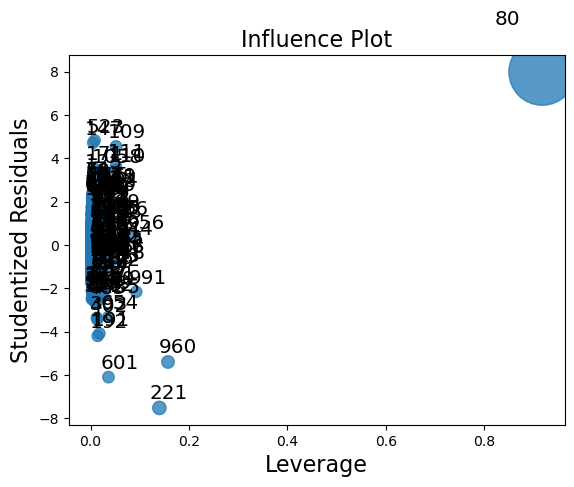

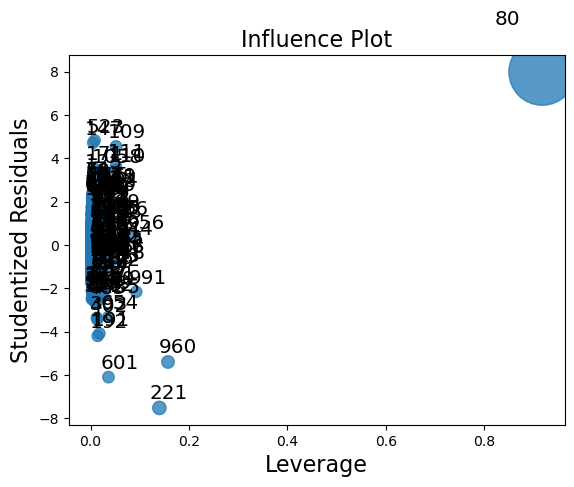

In [99]:
infl.plot_influence()

# Index 80 has highest Cook's distance

so drop this 80th row from dataset

In [124]:
df1[df1.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Variance Influence Factor

In [100]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


In [129]:
df1=df1.drop(df1.index[[80]],axis=0).reset_index()

In [131]:
df1.shape

(1434, 11)

In [132]:
model3 = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:02:04   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6281.3154   1382.716     -4.543      0.000   -8993.693   -3568.938
Age_08_04      -120.4096      2.562    -46.998      0.000    -125.435    -115.384
KM               -0.0178      0.001    -13.954      0.000      -0.020      -0.015
HP               39.3549      2.911     13.519      0.000      33.644      45.065
cc               -2.5267      0.307     -8.224      0.000      -3.129      -1.924
Doors           -28.0419     39.248     -0.714      0.475    -105.032      48.949
Gears           523.9417    192.860      2.717      0.007     145.621     902.262
Quarterly_Tax     9.0568      1.425      6.356      0.000       6.262      11.852
Weight           20.1625      1.116     18.073      0.000      17.974      22.351
==============================================================================
Omnibus:                      246.389   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2708.190
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                       9.675   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2 gives best r2_score

In [134]:
model3.params

Intercept       -6281.315436
Age_08_04        -120.409573
KM                 -0.017827
HP                 39.354934
cc                 -2.526666
Doors             -28.041885
Gears             523.941671
Quarterly_Tax       9.056842
Weight             20.162457
dtype: float64

# Predicting new data

# For model3

In [133]:
prediction = pd.DataFrame({"Age_08_04":35,"KM":35469, "HP":76,"cc":500,"Doors":4,"Gears":5,"Quarterly_Tax":230,"Weight":1200 },index=[1]) 
model3.predict(prediction)
print("The profit will be:",model3.predict(prediction)) 

The profit will be: 1    19385.251082
dtype: float64


# For model 2

In [138]:
prediction = pd.DataFrame({"Age_08_04":35,"KM":35469, "HP":76,"cc":500,"Doors":4,"Gears":5,"Quarterly_Tax":230,"Weight":1200 },index=[1]) 
Model2.predict(prediction)
print("The profit will be:",Model2.predict(prediction)) 

The profit will be: 1    15748.48574
dtype: float64


# For model 1

In [139]:
prediction = pd.DataFrame({"Age_08_04":35,"KM":35469, "HP":76,"cc":500,"Doors":4,"Gears":5,"Quarterly_Tax":230,"Weight":1200 },index=[1]) 
Model1.predict(prediction)
print("The profit will be:",Model1.predict(prediction))

The profit will be: [15811.58008331]


# Actual vs Predicated 

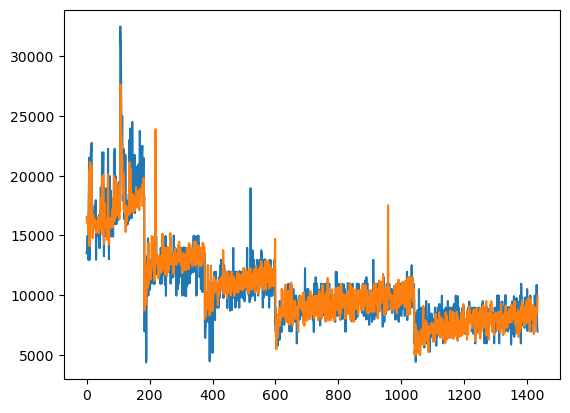

In [136]:
plt.plot(df1.Price)
plt.plot(model3.predict(df1))      
plt.show()